# U-bahn stations in Munich Graph Data Mining

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

## Visualization function

In [28]:
def draw(G, pos, measures, measure_name):
    plt.figure(figsize=(20, 20))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    edges = nx.draw_networkx_edges(G, pos)
    
    plt.title(measure_name, fontsize=30)
    plt.axis('off')
    plt.show()

## Sort dictionary by values

In [3]:
def dict_sort_by_value(dict_input):
    '''
    input: a dictionary;
    output: a dictionary sorted by value
    '''
    return sorted(dict_input.items(), key=lambda x: x[1], reverse=True)

## Load data

In [4]:
df = pd.read_csv('munich_ubahn.csv')
df

,Last stop,Next stop,Line,Duration(min)
0,Olympia-Einkaufszentrum,Georg-Brauchle-Ring,U1,2
1,Georg-Brauchle-Ring,Westfriedhof,U1,1
2,Westfriedhof,Gern,U1,1
3,Gern,Rotkreuzplatz,U1,2
4,Rotkreuzplatz,Maillingerstraße,U1,2
...,...,...,...,...
113,Partnachplatz,Westpark,U6,1
114,Westpark,Holzapfelkreuth,U6,2
115,Holzapfelkreuth,Haderner Stern Station,U6,1
116,Haderner Stern Station,Großhadern,U6,2


## Build graph

In [5]:
G = nx.Graph()
for idx, row in df.iterrows():
    G.add_edges_from([(row['Last stop'], row['Next stop'])], line=row['Line'], time=row['Duration(min)'])

In [7]:
len(G.nodes)

96

In [8]:
len(G.edges)

99

In [9]:
G.edges[('Garching-Forschungszentrum', 'Garching')]

{'line': 'U6', 'time': 3}

## Visualization

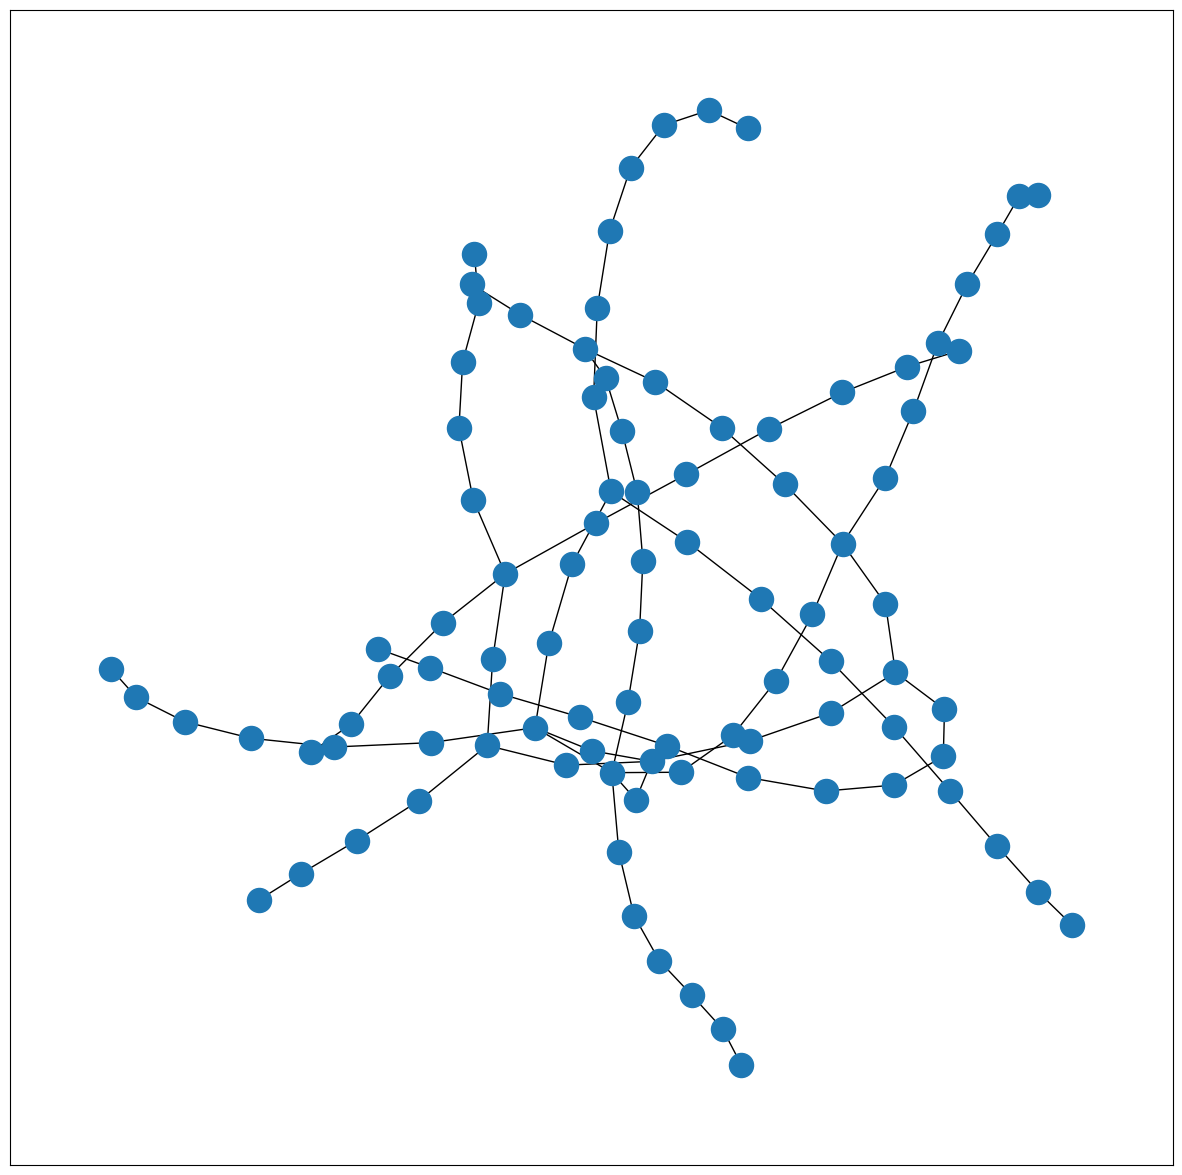

In [38]:
pos = nx.spring_layout(G, seed=12)

plt.figure(figsize=(15, 15))
nx.draw_networkx(G, pos=pos, with_labels=False)

## Shortest Path

In [17]:
# Check if there exists a path
nx.has_path(G, source='Hauptbahnhof', target='Garching-Forschungszentrum')

True

In [18]:
# Shortest Path
nx.shortest_path(G, source='Hauptbahnhof', target='Garching-Forschungszentrum', weight='time')

['Hauptbahnhof',
 'Karlsplatz',
 'Odeonsplatz',
 'Universität',
 'Giselastraße',
 'Münchener Freiheit',
 'Dietlindenstraße',
 'Nordfriedhof',
 'Alte Heide',
 'Studentenstadt',
 'Freimann',
 'Kieferngarten',
 'Fröttmaning',
 'Garching-Hochbrück',
 'Garching',
 'Garching-Forschungszentrum']

In [22]:
# Shortest Path Length
nx.shortest_path_length(G, source='Hauptbahnhof', target='Garching-Forschungszentrum', weight='time')

27

In [23]:
# Average shortest path length
nx.average_shortest_path_length(G, weight='time')

16.084868421052633

## Navigation

In [25]:
A_station = 'Garching-Forschungszentrum'
B_station = 'Olympiazentrum'

shortest_path_list = nx.shortest_path(G, source=A_station, target=B_station, weight='time')

for i in range(len(shortest_path_list)-1):
    previous_station = shortest_path_list[i]
    next_station = shortest_path_list[i+1]
    line_id = G.edges[(previous_station, next_station)]['line']
    time = G.edges[(previous_station, next_station)]['time']
    print('{}--->{} {} {} minutes'.format(previous_station, next_station, line_id, time))
    
print('In total: {} minutes.'.format(nx.shortest_path_length(G, source=A_station, target=B_station, weight='time')))

Garching-Forschungszentrum--->Garching U6 3 minutes
Garching--->Garching-Hochbrück U6 2 minutes
Garching-Hochbrück--->Fröttmaning U6 4 minutes
Fröttmaning--->Kieferngarten U6 2 minutes
Kieferngarten--->Freimann U6 2 minutes
Freimann--->Studentenstadt U6 2 minutes
Studentenstadt--->Alte Heide U6 1 minutes
Alte Heide--->Nordfriedhof U6 1 minutes
Nordfriedhof--->Dietlindenstraße U6 2 minutes
Dietlindenstraße--->Münchener Freiheit U6 1 minutes
Münchener Freiheit--->Bonner Platz U3 2 minutes
Bonner Platz--->Scheidplatz U3 1 minutes
Scheidplatz--->Petuelring U3 2 minutes
Petuelring--->Olympiazentrum U3 1 minutes
In total: 26 minutes.


## Node Degree

In [26]:
dict_sort_by_value(dict(G.degree()))

[('Hauptbahnhof', 5),
 ('Sendlinger Tor', 4),
 ('Scheidplatz', 4),
 ('Innsbrucker Ring', 4),
 ('Odeonsplatz', 4),
 ('Olympia-Einkaufszentrum', 3),
 ('Kolumbusplatz', 3),
 ('Münchener Freiheit', 3),
 ('Implerstraße', 3),
 ('Max-Weber-Platz', 3),
 ('Georg-Brauchle-Ring', 2),
 ('Westfriedhof', 2),
 ('Gern', 2),
 ('Rotkreuzplatz', 2),
 ('Maillingerstraße', 2),
 ('Stiglmaierplatz', 2),
 ('Fraunhoferstraße', 2),
 ('Candidplatz', 2),
 ('Wettersteinplatz', 2),
 ('St.-Quirin-Platz', 2),
 ('Hasenbergl', 2),
 ('Dülferstraße', 2),
 ('Harthof', 2),
 ('Am Hart', 2),
 ('Frankfurter Ring', 2),
 ('Milbertshofen', 2),
 ('Hohenzollernplatz', 2),
 ('Josephsplatz', 2),
 ('Theresienstraße', 2),
 ('Königsplatz', 2),
 ('Silberhornstraße', 2),
 ('Untersbergstraße', 2),
 ('Giesing', 2),
 ('Karl-Preis-Platz', 2),
 ('Josephsburg', 2),
 ('Kreillerstraße', 2),
 ('Trudering', 2),
 ('Moosfeld', 2),
 ('Messestadt West', 2),
 ('Moosacher St.-Martins-Platz', 2),
 ('Oberwiesenfeld', 2),
 ('Olympiazentrum', 2),
 ('Petuelr

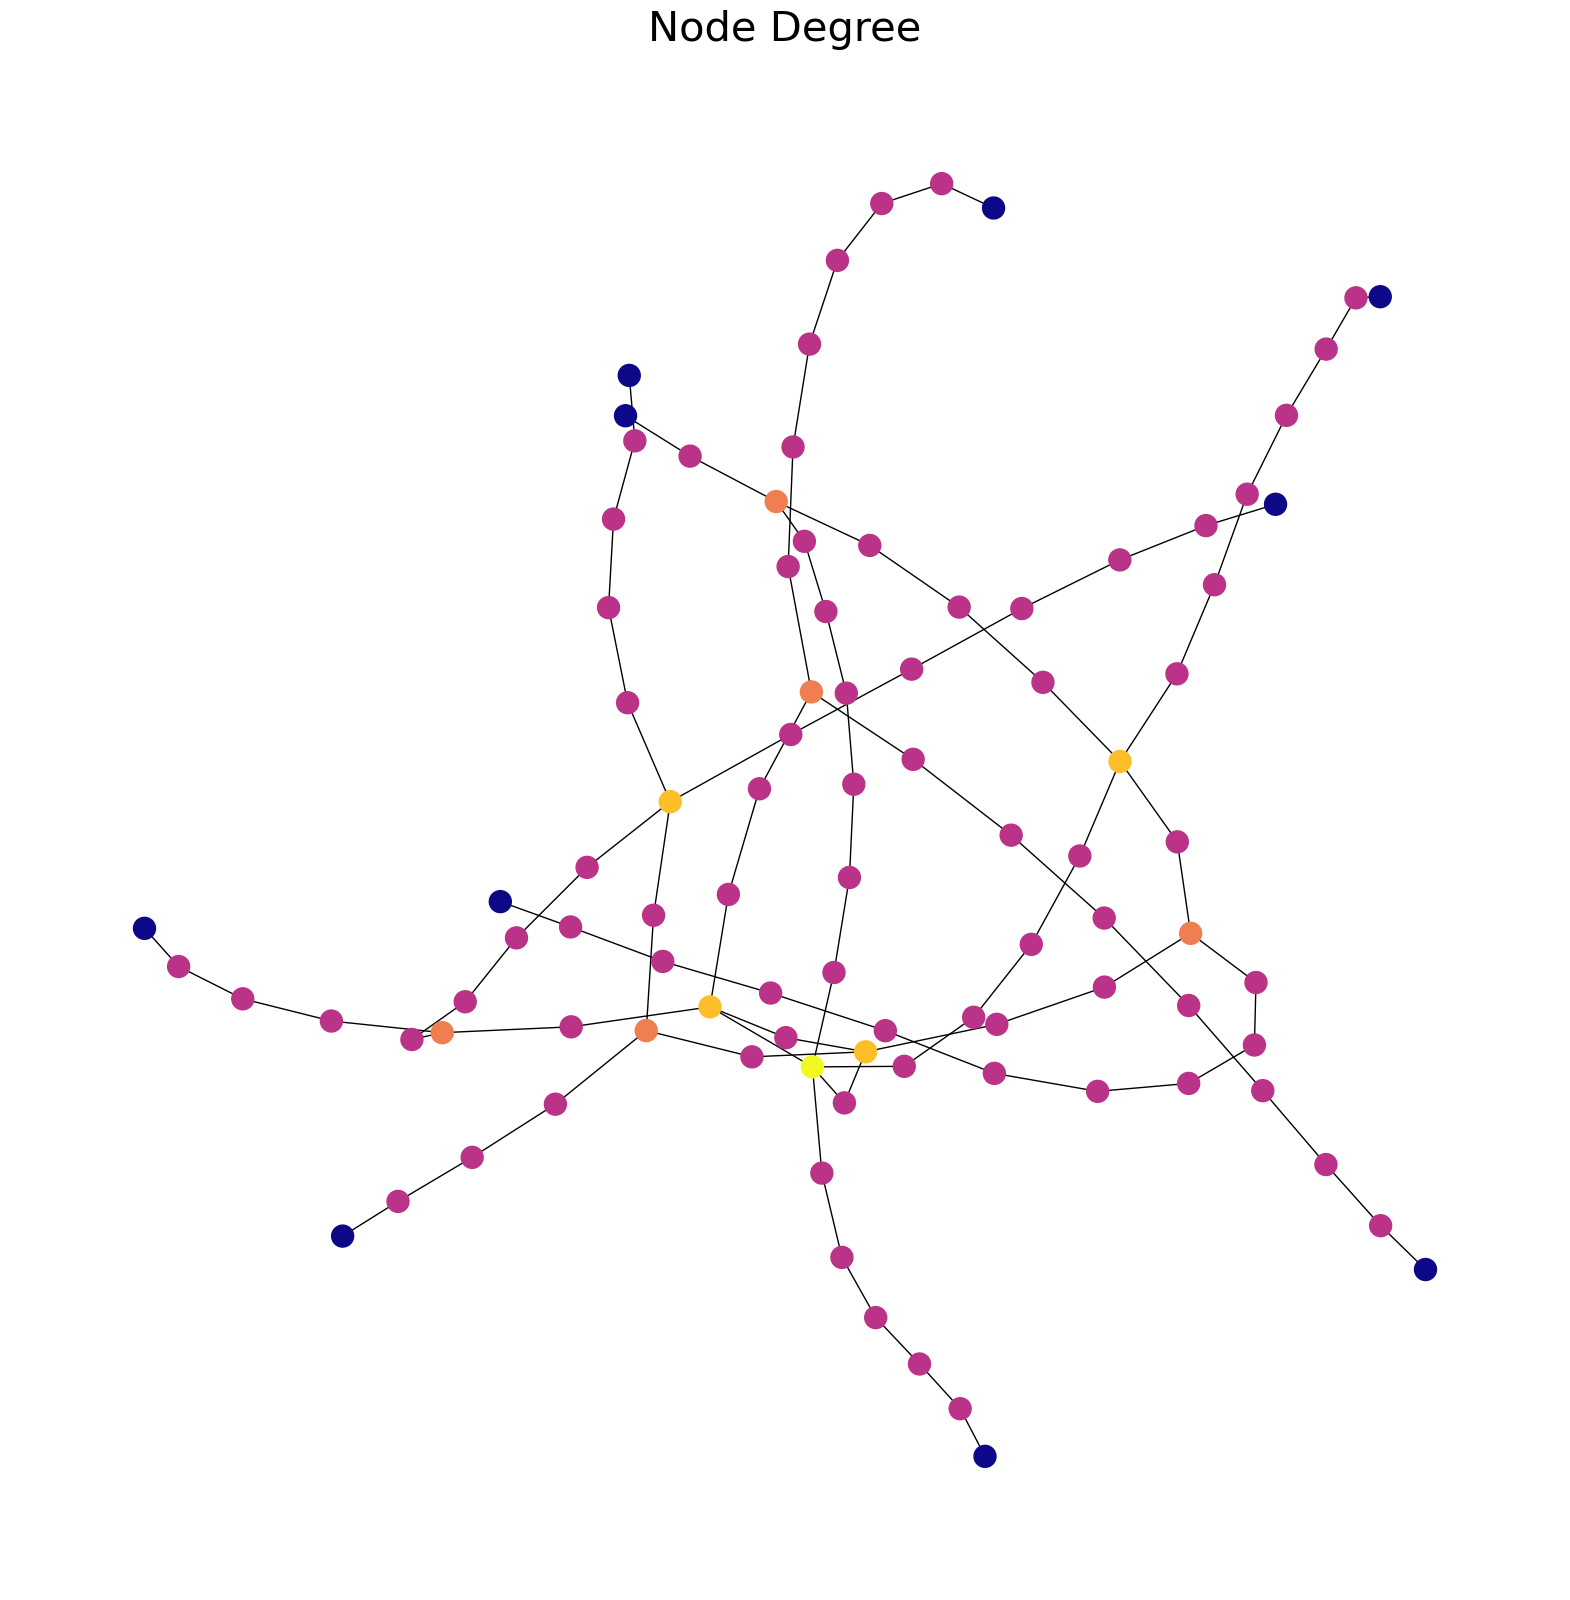

In [29]:
draw(G, pos, dict(G.degree()), 'Node Degree')

## Degree Centrality

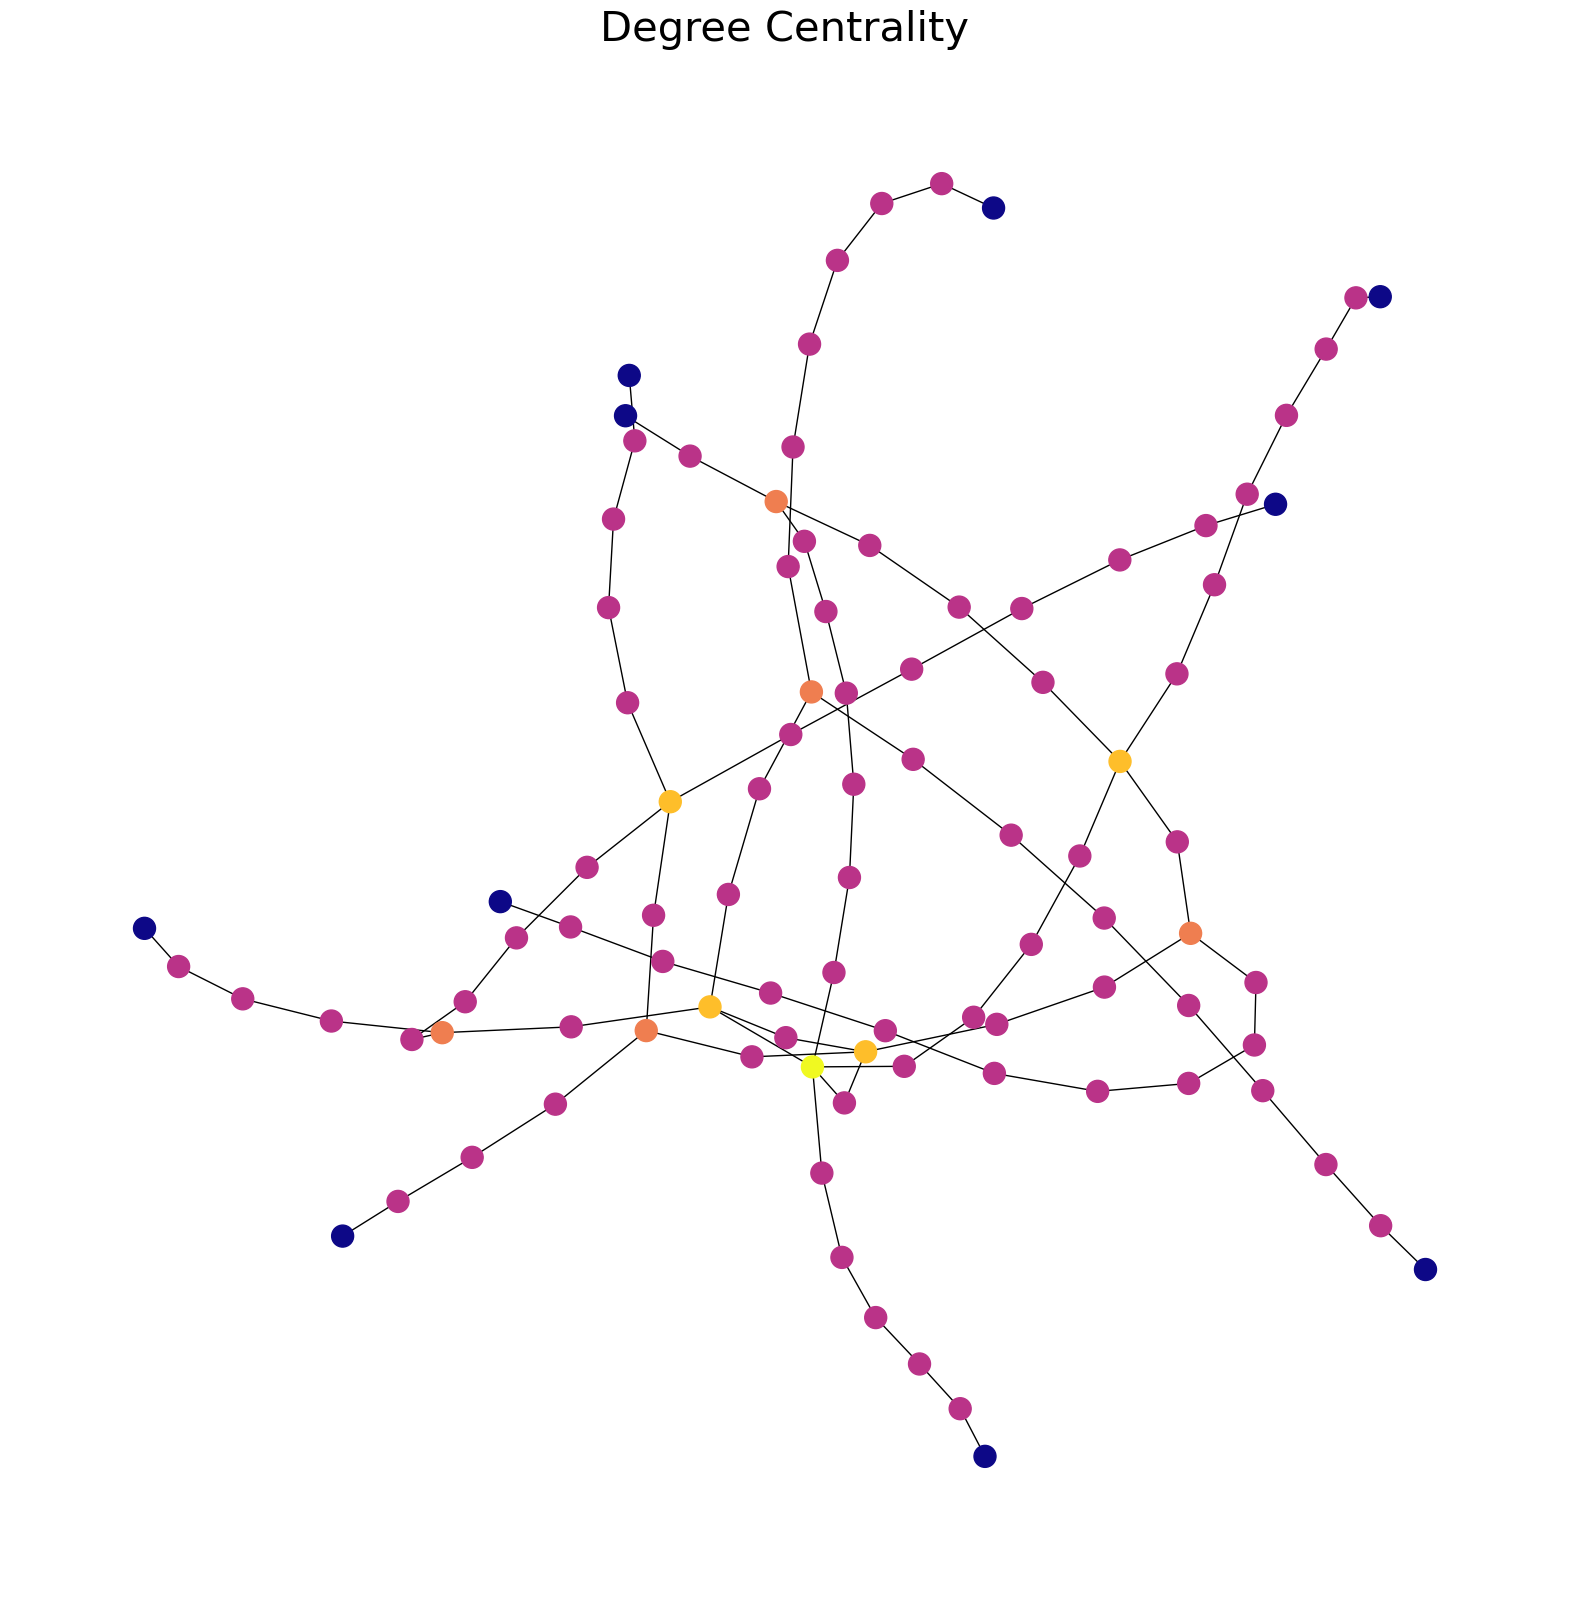

In [30]:
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

## Eigenvector Centrality

In [31]:
dict_sort_by_value(nx.eigenvector_centrality(G))

[('Hauptbahnhof', 0.4993149627171288),
 ('Sendlinger Tor', 0.4159778111397999),
 ('Odeonsplatz', 0.3055992507393438),
 ('Karlsplatz', 0.2947053037931188),
 ('Marienplatz', 0.26419301138119317),
 ('Königsplatz', 0.21806760903015282),
 ('Stiglmaierplatz', 0.21751331505957947),
 ('Theresienwiese', 0.21749552926896096),
 ('Fraunhoferstraße', 0.1898211990443965),
 ('Goetheplatz', 0.1828147497786518),
 ('Lehel', 0.14066854629101733),
 ('Universität', 0.1350962514015631),
 ('Kolumbusplatz', 0.10247365700415638),
 ('Theresienstraße', 0.09628397340036446),
 ('Maillingerstraße', 0.09477137776815747),
 ('Schwanthalerhöhe', 0.09472287338043883),
 ('Poccistraße', 0.0833376762868309),
 ('Max-Weber-Platz', 0.0785950857503013),
 ('Giselastraße', 0.06337731843798905),
 ('Silberhornstraße', 0.04546966957690871),
 ('Josephsplatz', 0.0449065271671359),
 ('Implerstraße', 0.04480304266437968),
 ('Candidplatz', 0.04459116833658307),
 ('Rotkreuzplatz', 0.041332635415426484),
 ('Heimeranplatz', 0.0412181141111

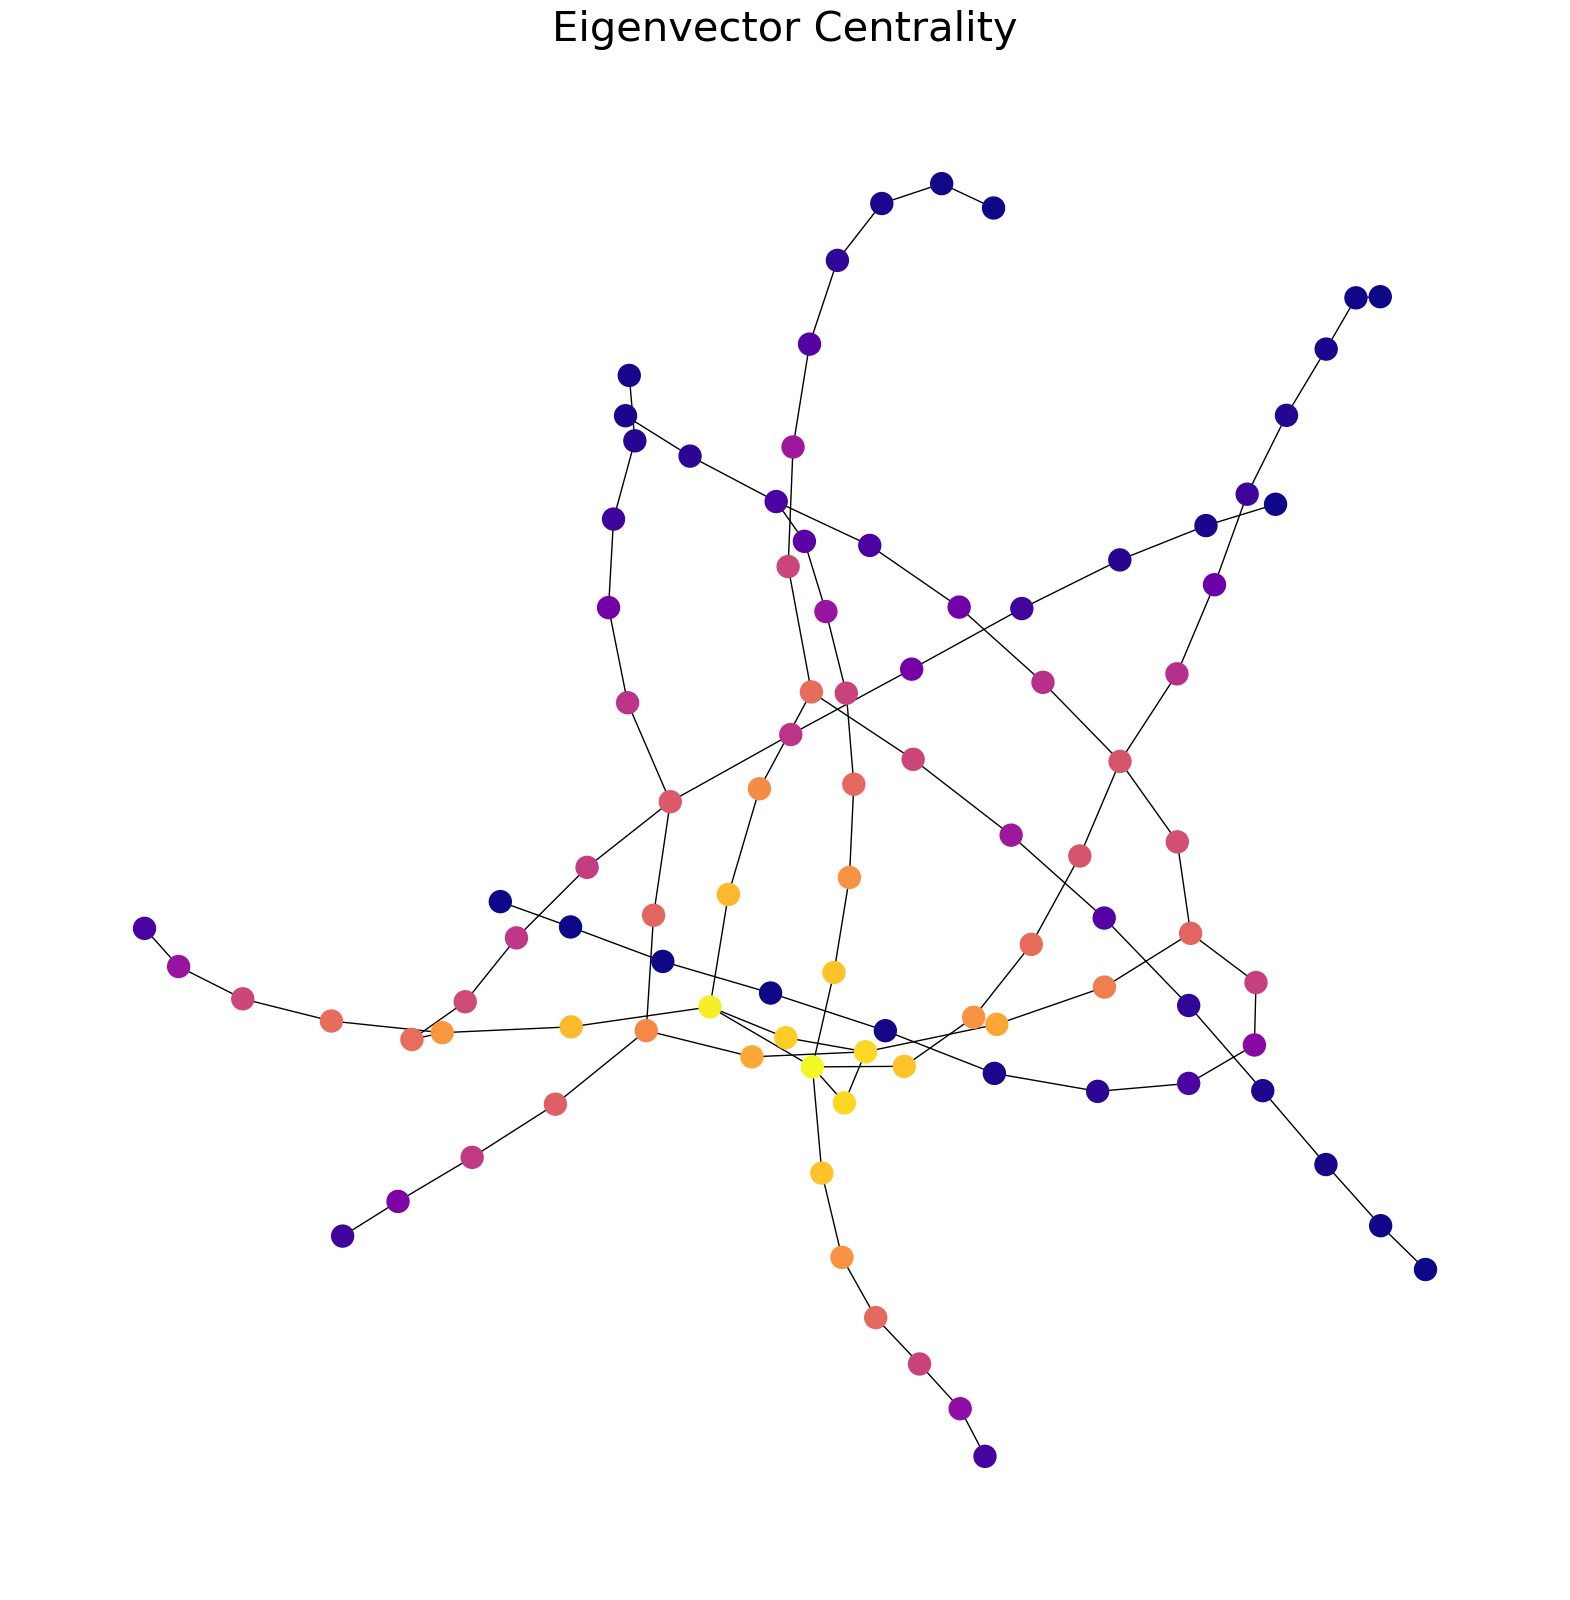

In [33]:
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')

## Betweenness Centrality

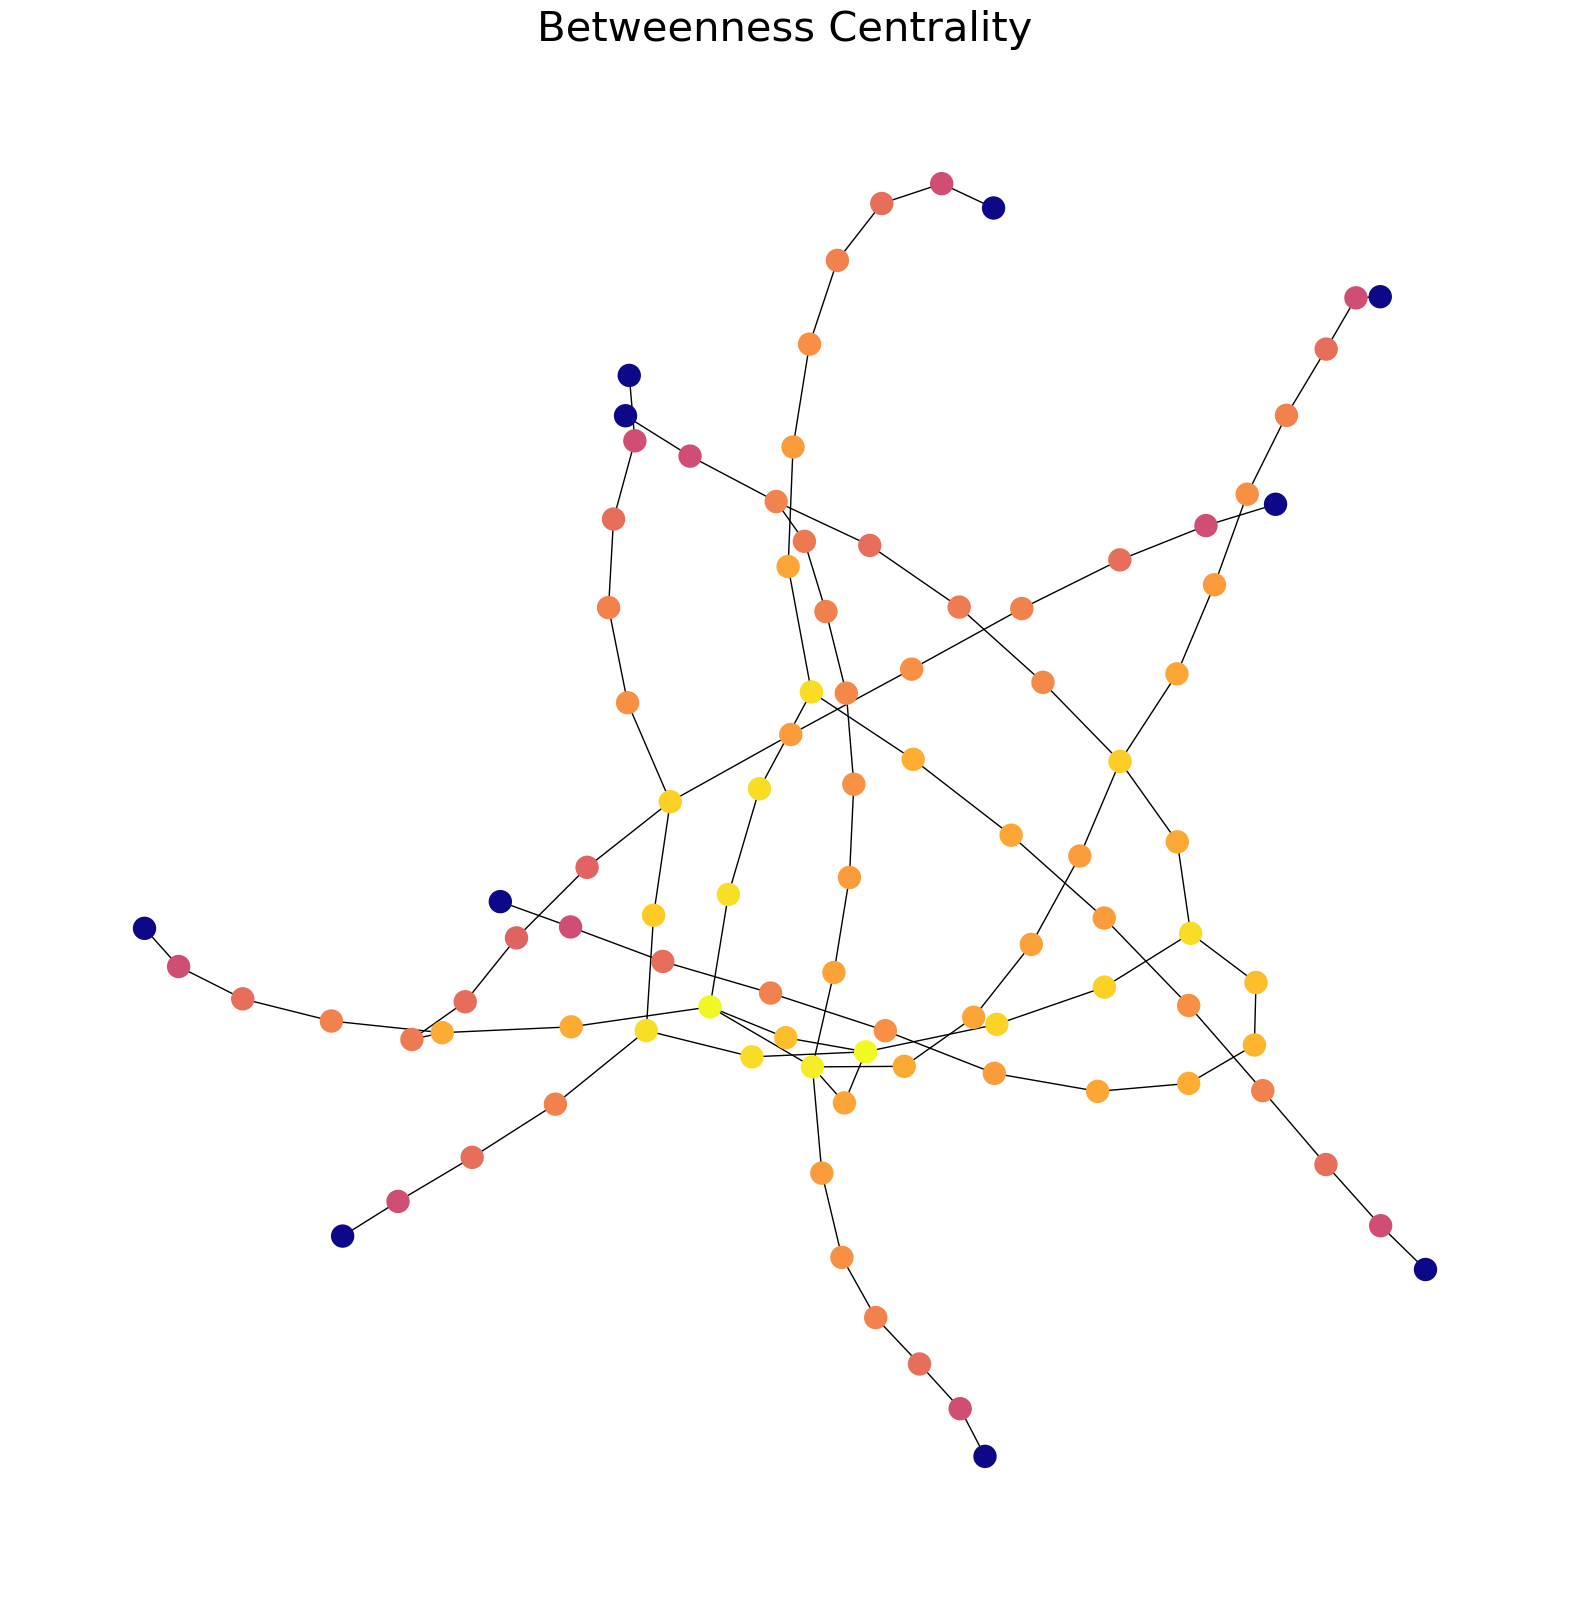

In [34]:
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

## Closeness Centrality

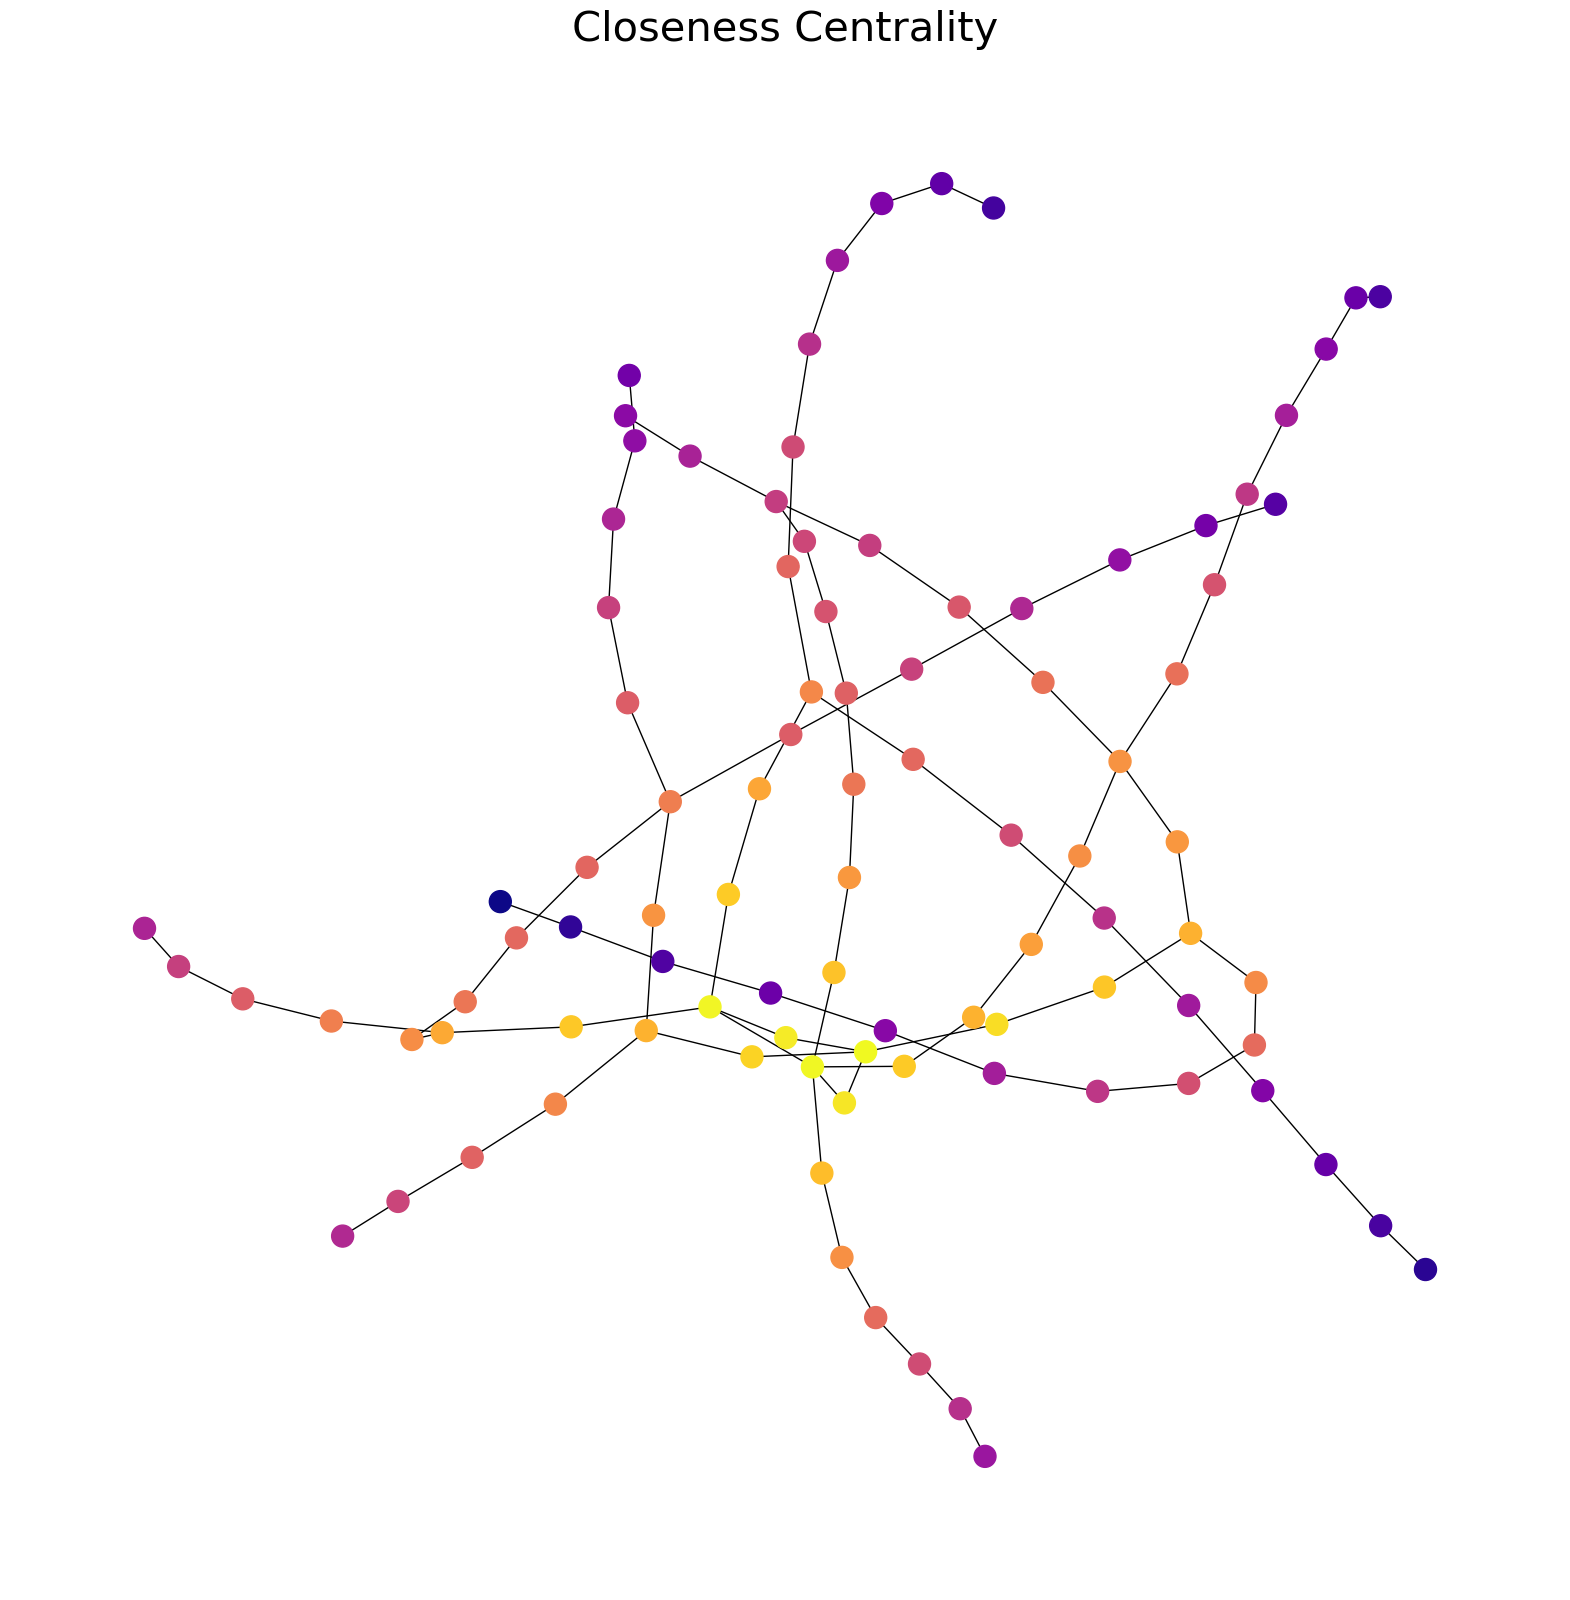

In [35]:
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')

## PageRank

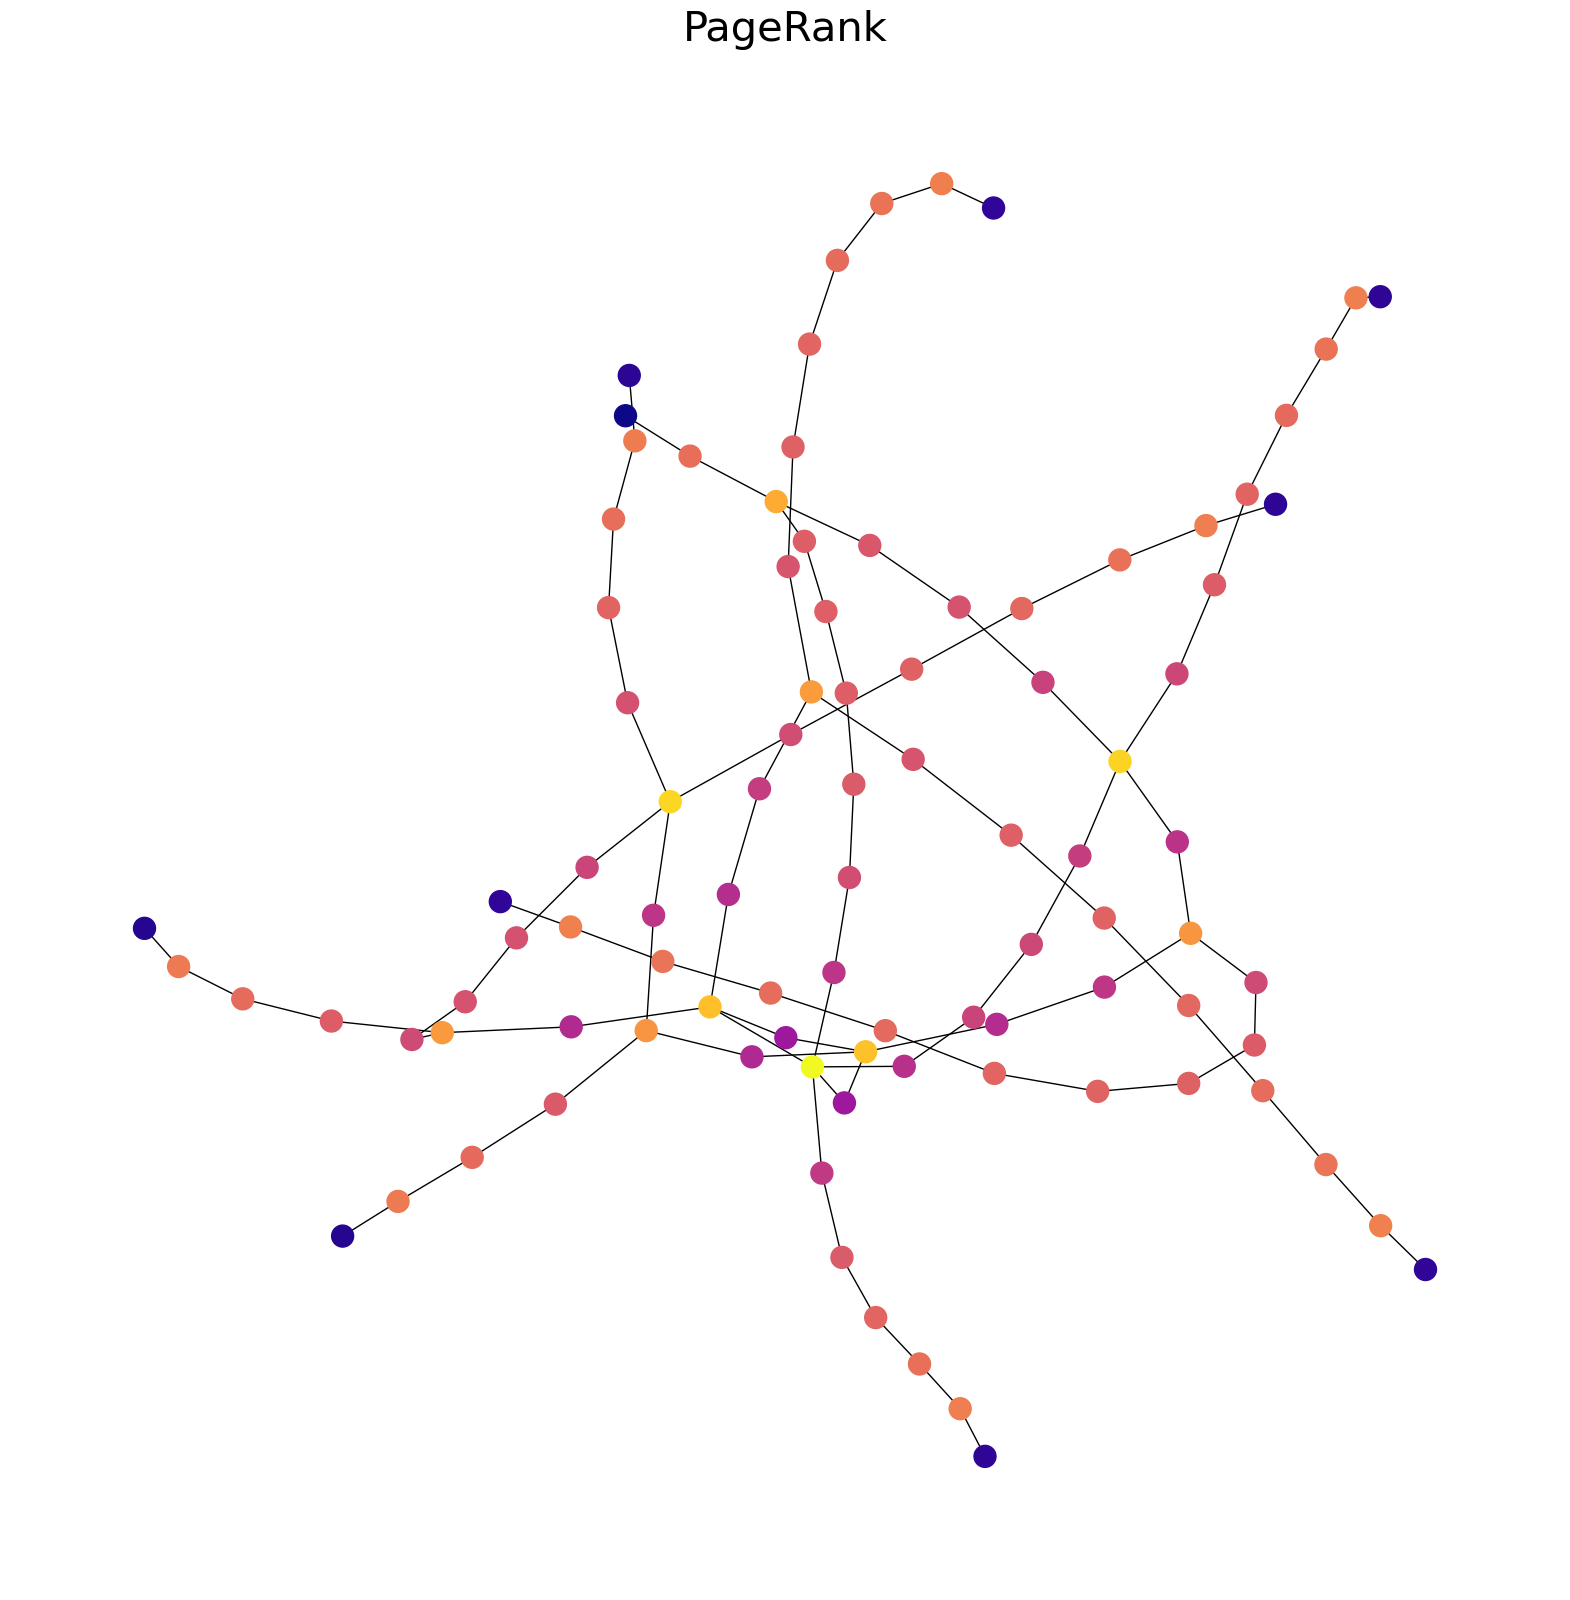

In [36]:
draw(G, pos, nx.pagerank(G, alpha=0.85), 'PageRank')

## Katz Centrality

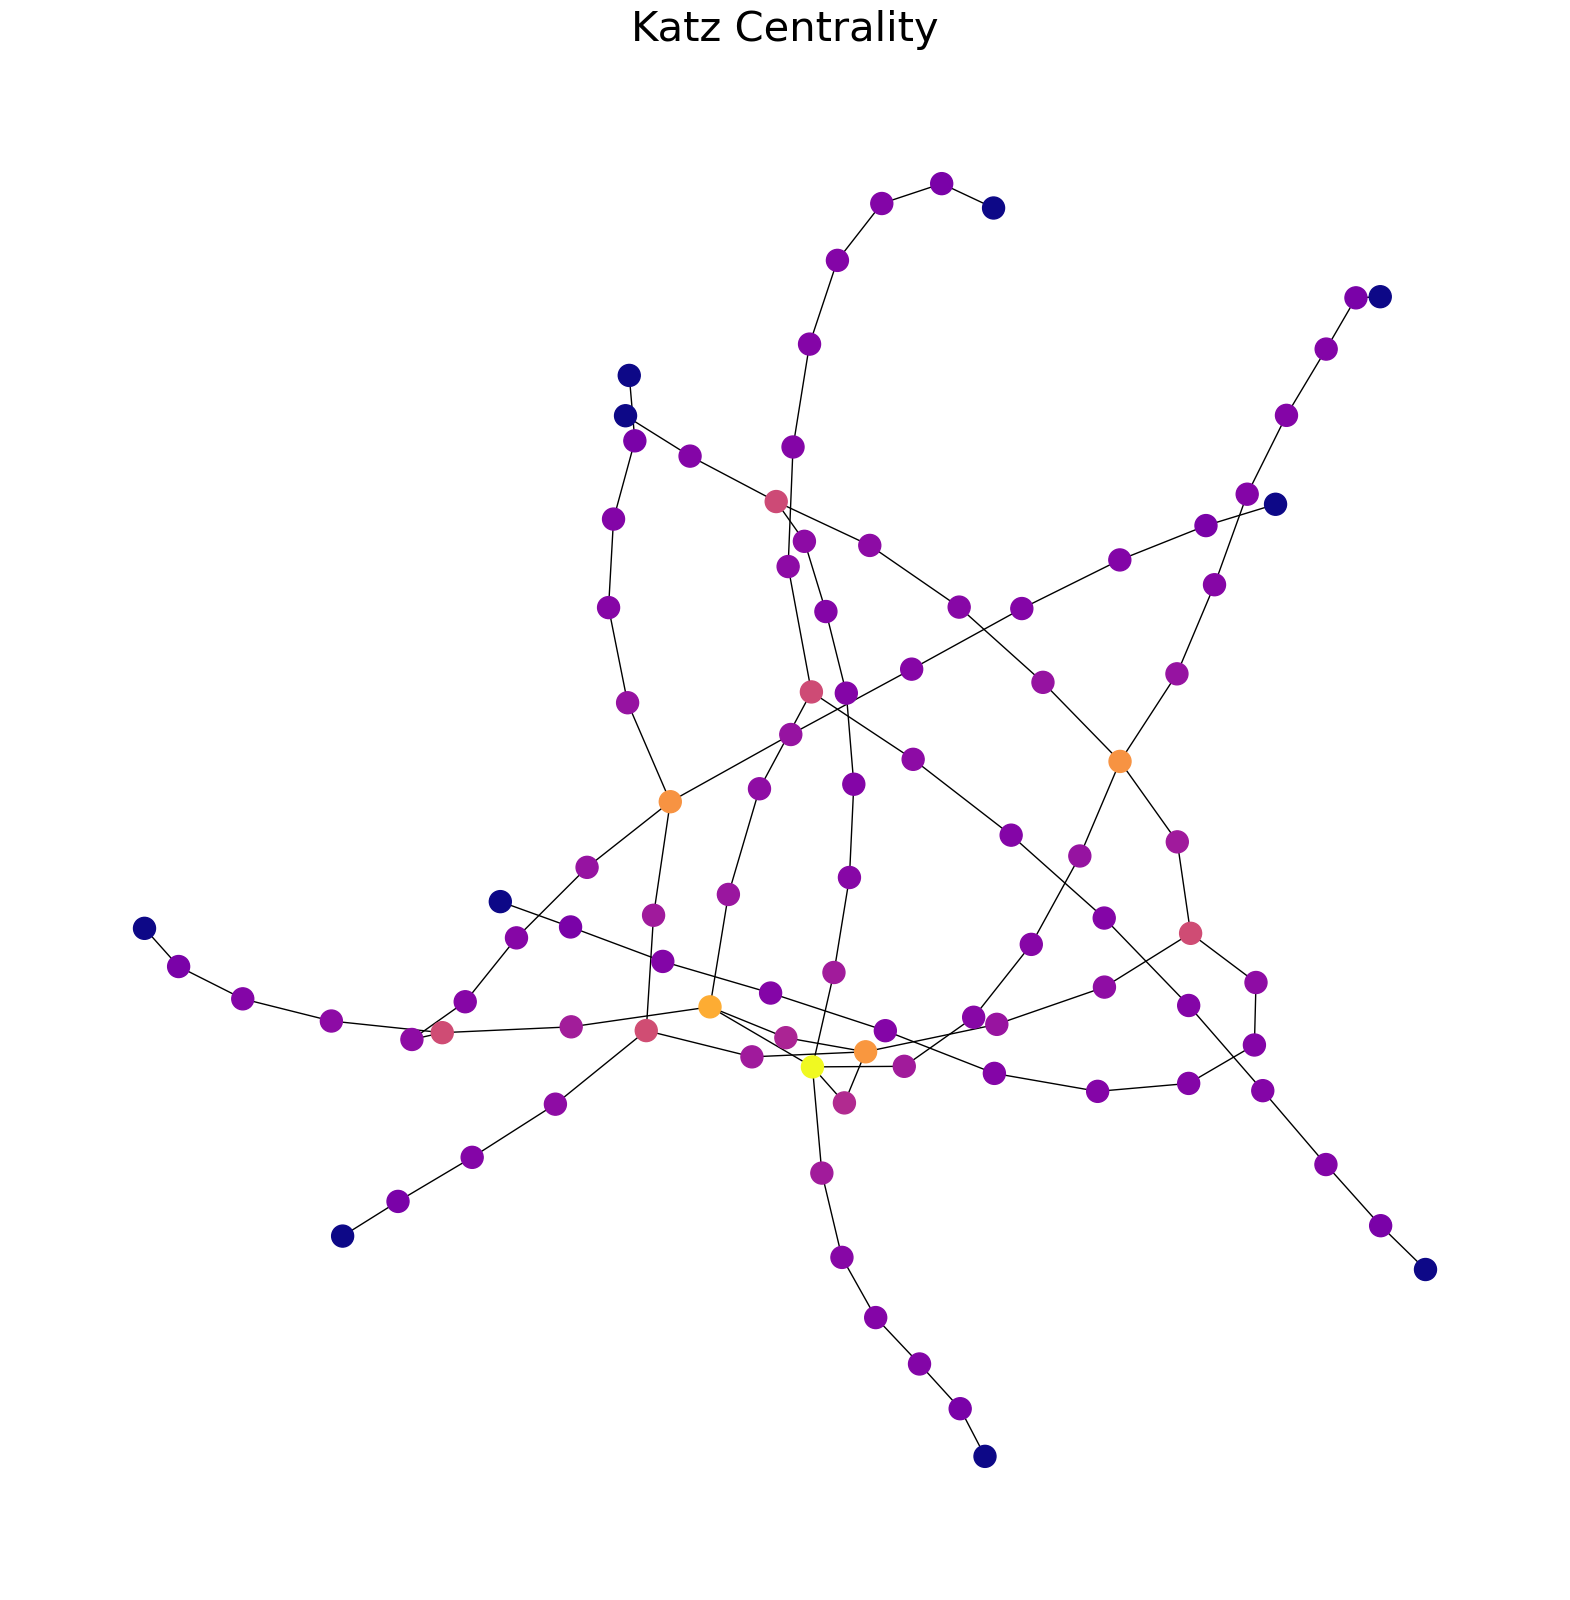

In [39]:
draw(G, pos, nx.katz_centrality(G, alpha=0.1, beta=1.0), 'Katz Centrality')

## HITS Hubs and Authorities

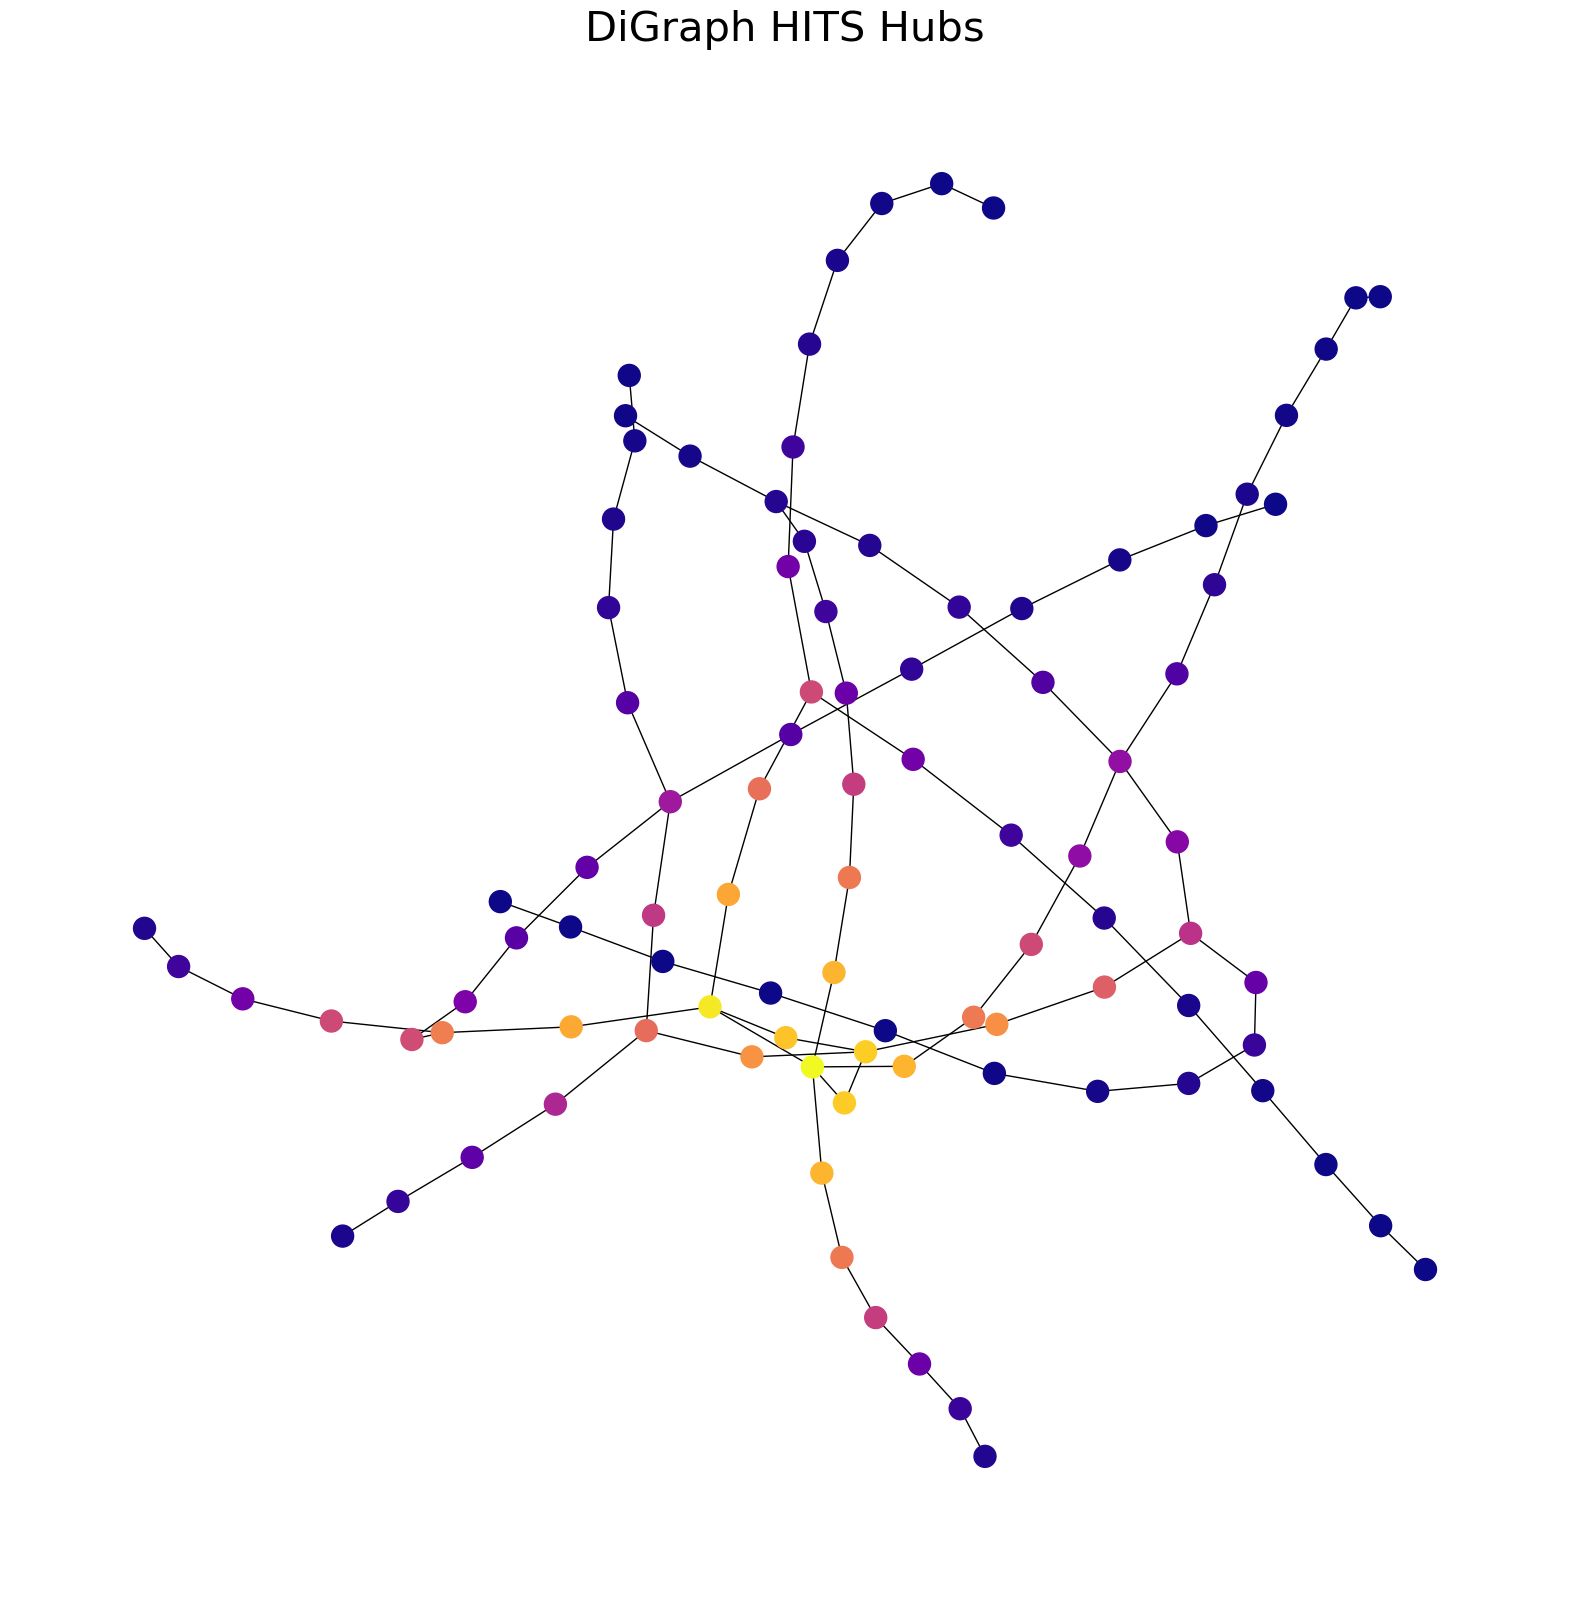

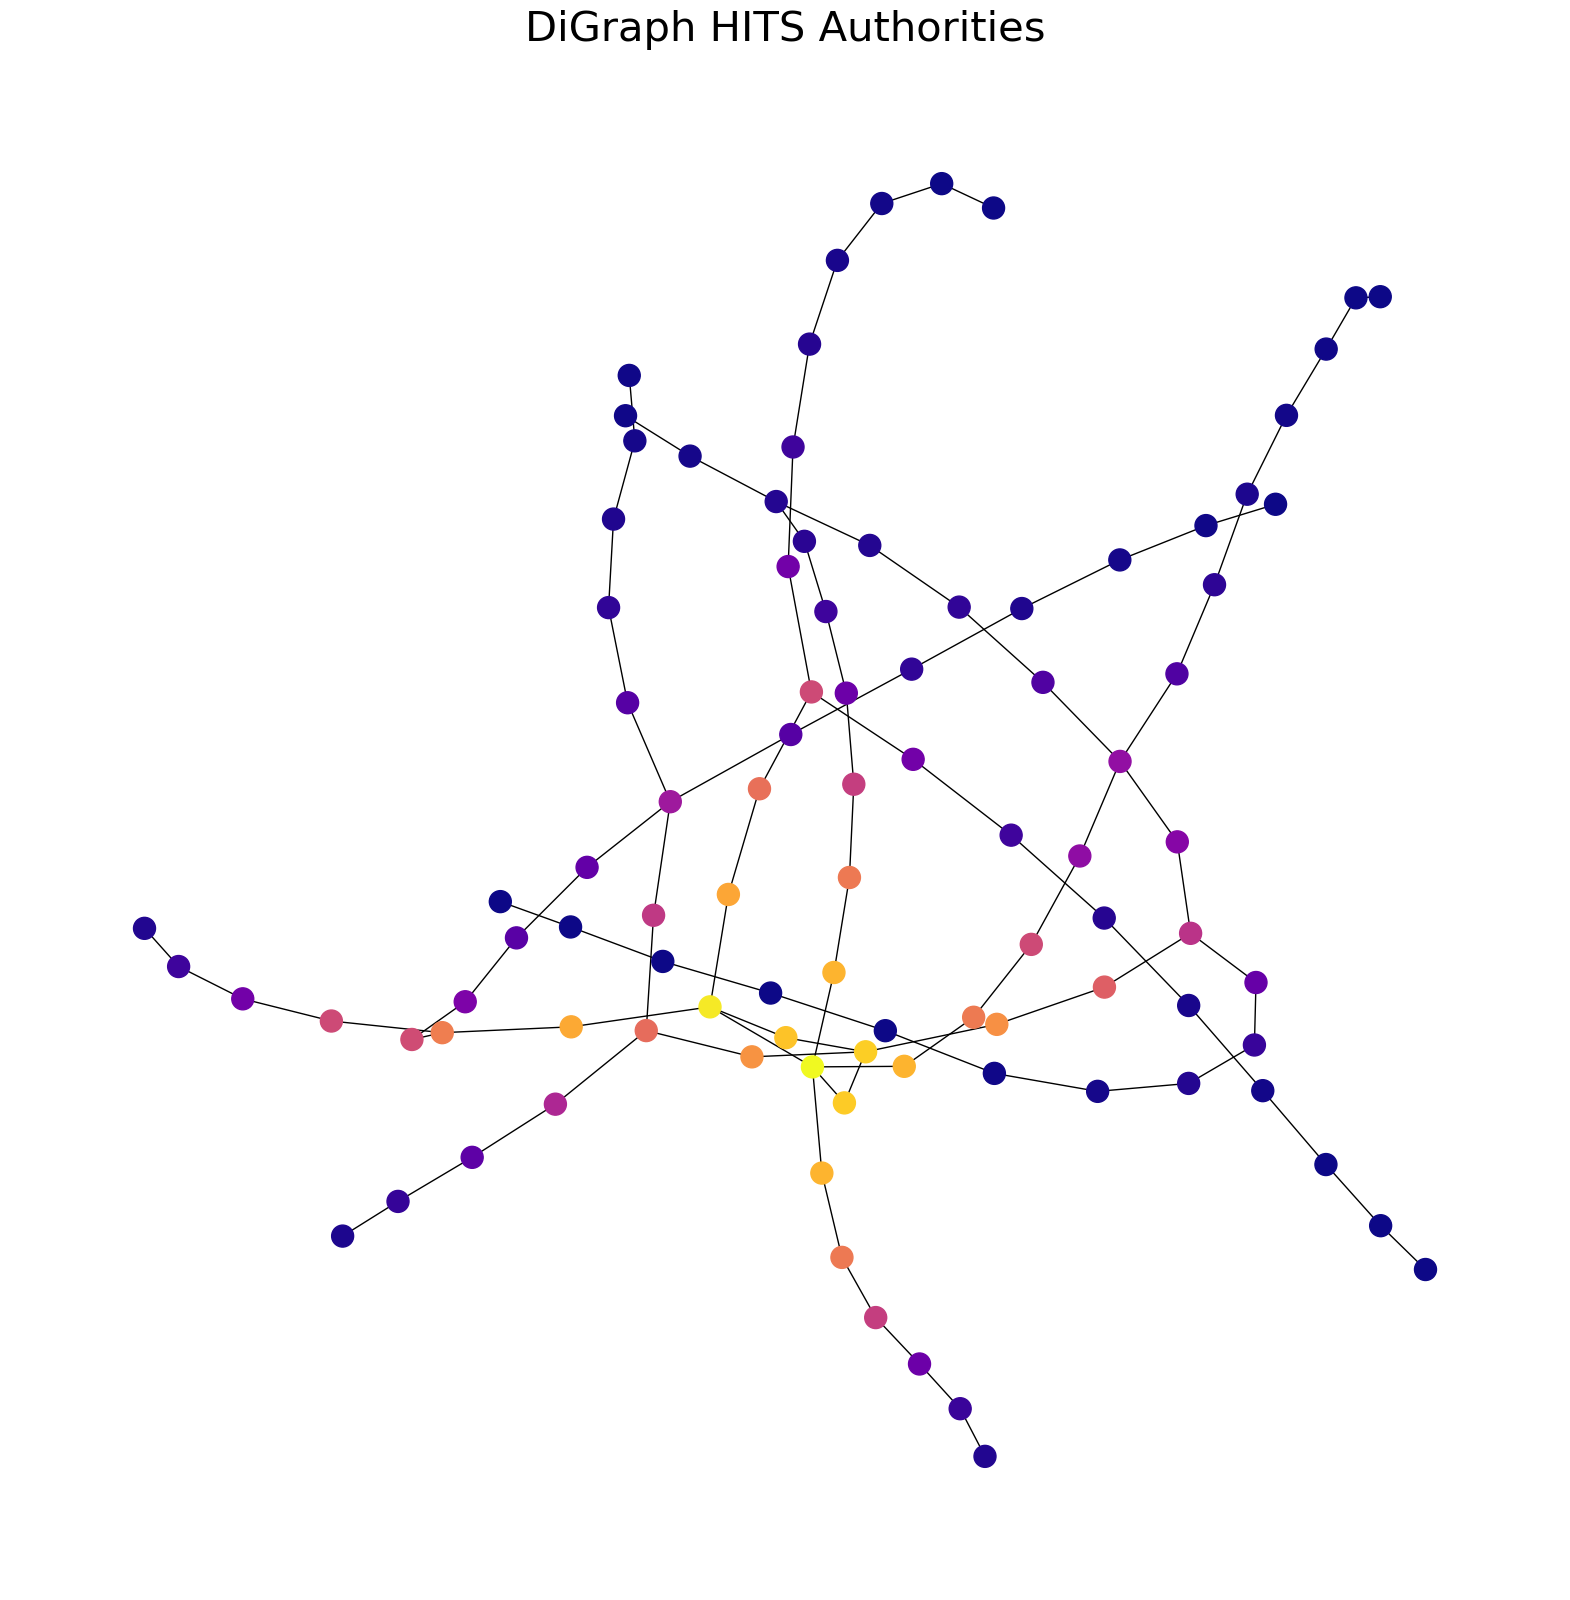

In [41]:
h, a = nx.hits(G)
draw(G, pos, h, 'DiGraph HITS Hubs')
draw(G, pos, a, 'DiGraph HITS Authorities')

## Clustering Coefficient

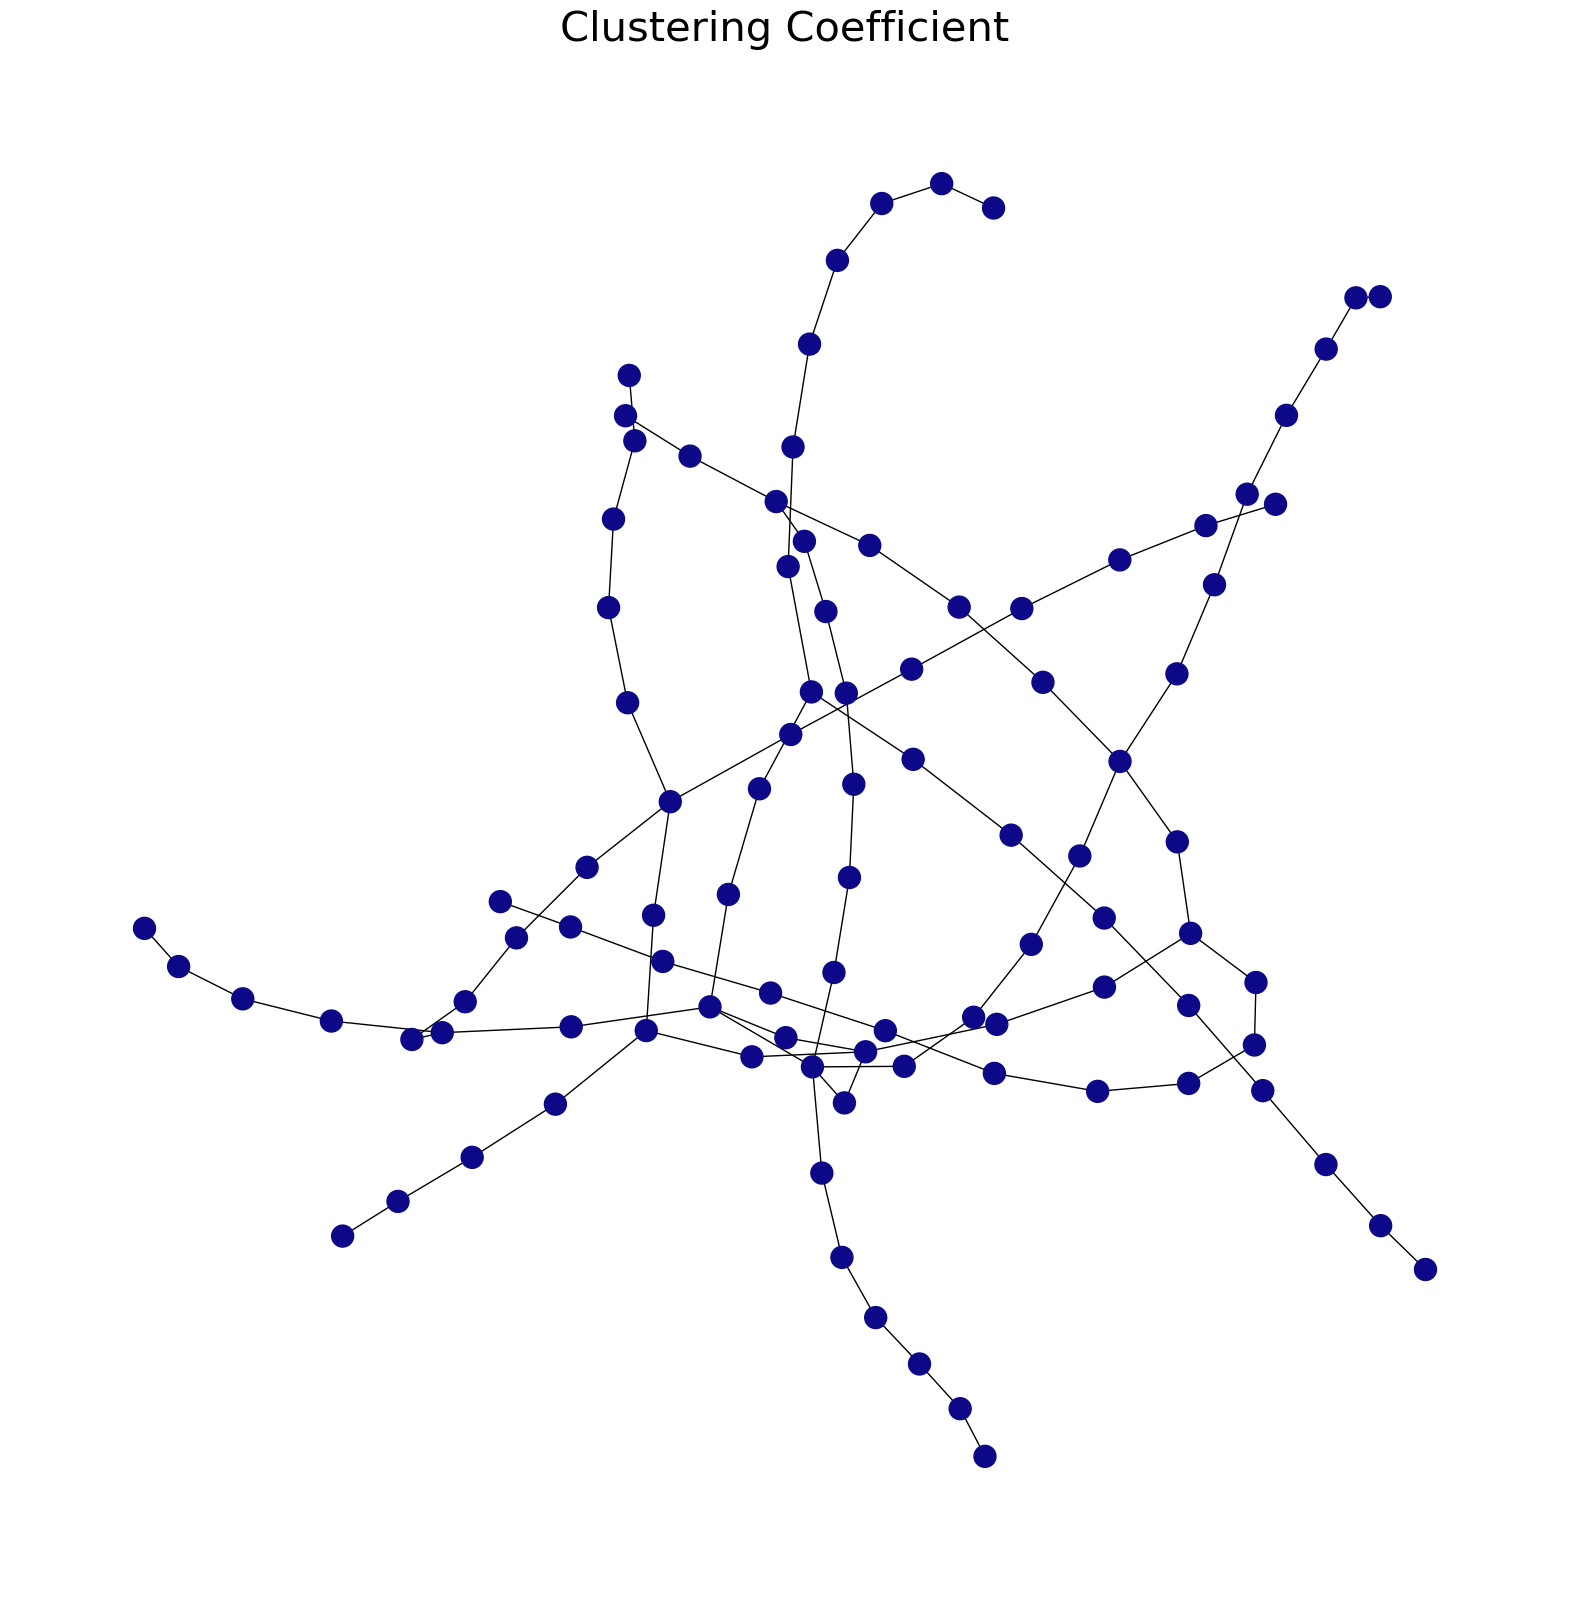

In [44]:
draw(G, pos, nx.clustering(G), 'Clustering Coefficient')